In [1]:
# Libraries
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_curve, plot_roc_curve, confusion_matrix, plot_confusion_matrix 
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

# Data Pre-processing and Feature Preparation

In [2]:
# Import dataset
data_orig = pd.read_csv('Project_Data_EE4C12_SET_PV.csv')
data_orig

,Irradiance,Ambient_Temperature,Sun_Azimuth,Sun_Elevation,System_Power,System_Age,System_Status,Fault_Type
0,713,3.8,-71.3,19.8,5000.000000,0.073277,0,0
1,152,2.7,-28.2,11.7,1290.467722,3.731482,0,0
2,75,4.5,-49.6,23.1,366.571466,0.236534,0,0
3,379,17.7,-46.3,45.3,2261.488687,1.720781,0,0
4,453,14.2,-107.2,15.9,2616.082381,0.674352,0,0
...,...,...,...,...,...,...,...,...
11995,62,10.2,-17.2,13.3,118.293683,13.476348,1,3
11996,114,14.8,-17.4,33.2,253.335320,4.542954,1,3
11997,144,6.1,41.2,6.4,526.328072,14.553955,1,3
11998,486,9.6,56.1,14.8,1707.208551,6.610661,1,3


In [3]:
# Dataset transformation using one-hot encoding for multi-class classification

data = data_orig.drop('Fault_Type', axis=1) # remove the ordinary encoding column
data['Healthy'] = np.where(data_orig['Fault_Type'] == 0, 1, 0)
data['Short_Circuit'] = np.where(data_orig['Fault_Type'] == 1, 1, 0)
data['Broken_Cells'] = np.where(data_orig['Fault_Type'] == 2, 1, 0)
data['Broken_Strings'] = np.where(data_orig['Fault_Type'] == 3, 1, 0)
data

,Irradiance,Ambient_Temperature,Sun_Azimuth,Sun_Elevation,System_Power,System_Age,System_Status,Healthy,Short_Circuit,Broken_Cells,Broken_Strings
0,713,3.8,-71.3,19.8,5000.000000,0.073277,0,1,0,0,0
1,152,2.7,-28.2,11.7,1290.467722,3.731482,0,1,0,0,0
2,75,4.5,-49.6,23.1,366.571466,0.236534,0,1,0,0,0
3,379,17.7,-46.3,45.3,2261.488687,1.720781,0,1,0,0,0
4,453,14.2,-107.2,15.9,2616.082381,0.674352,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
11995,62,10.2,-17.2,13.3,118.293683,13.476348,1,0,0,0,1
11996,114,14.8,-17.4,33.2,253.335320,4.542954,1,0,0,0,1
11997,144,6.1,41.2,6.4,526.328072,14.553955,1,0,0,0,1
11998,486,9.6,56.1,14.8,1707.208551,6.610661,1,0,0,0,1


In [4]:
print('Dataset dimention: ', data.shape)
if data.isnull().values.any():
    print('Some values are missing')
else:
    print('Noo missing values')

Dataset dimention:  (12000, 11)
Noo missing values


In [5]:
# Training-testing sets split: from now on the testing set must not be part of any operation, in order to prevent data leak

training_set, testing_set = train_test_split(data, test_size=0.15, random_state=4720)

X_training = training_set[['Irradiance', 'Ambient_Temperature', 'Sun_Azimuth', 'Sun_Elevation', 
                              'System_Power', 'System_Age']]
y_2c_training = training_set['System_Status']
y_mc_training = training_set[['Healthy', 'Short_Circuit', 'Broken_Cells', 'Broken_Strings']]

X_test = testing_set[['Irradiance', 'Ambient_Temperature', 'Sun_Azimuth', 'Sun_Elevation', 
                              'System_Power', 'System_Age']]
y_2c_test = testing_set['System_Status']
y_mc_test = testing_set[['Healthy', 'Short_Circuit', 'Broken_Cells', 'Broken_Strings']]

In [18]:
#training_set

In [97]:
#testing_set

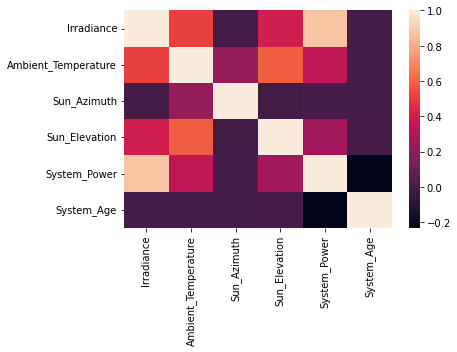

In [6]:
# Correlation matrix
corr_matrix = X_training.corr()
sn.heatmap(corr_matrix)
plt.show()

In [7]:
# Scaling of the features

scaler = StandardScaler()
scaler.fit(X_training)
X_training_scaled = scaler.transform(X_training)

# Binary Classification Model 1

In [8]:
X_train, X_val, y_train_2c, y_val_2c = train_test_split(X_training_scaled, y_2c_training, test_size=0.15, random_state=4720)
from sklearn.preprocessing import PolynomialFeatures
pol = PolynomialFeatures(degree=3)
pol.fit(X_train)
X_train_pol = pol.transform(X_train)
X_val_pol = pol.transform(X_val)
lr = LogisticRegression(max_iter=1000)
y_pred_pol = lr.fit(X_train_pol, y_train_2c).predict(X_val_pol)
Accuracy = accuracy_score(y_val_2c,y_pred_pol)
F1= f1_score(y_val_2c,y_pred_pol)
Precision = precision_score(y_val_2c,y_pred_pol)
Recall = recall_score(y_val_2c,y_pred_pol)
print("Accuracy with linear features: " + str(Accuracy))
print("F1 score with linear features: " + str(F1))
print("Recall score with linear features: " + str(Precision))
print("Precision score with linear features: " + str(Recall))

Accuracy: 0.8071895424836601


In [35]:
rfc = RandomForestClassifier(n_estimators=90)
y_pred = rfc.fit(X_train, y_train_2c).predict(X_val)
Accuracy = accuracy_score(y_val_2c,y_pred)
F1= f1_score(y_val_2c,y_pred)
Precision = precision_score(y_val_2c,y_pred)
Recall = recall_score(y_val_2c,y_pred)
print("Accuracy with linear features: " + str(Accuracy))
print("F1 score with linear features: " + str(F1))
print("Recall score with linear features: " + str(Precision))
print("Precision score with linear features: " + str(Recall))

Accuracy: 0.7908496732026143


don't run it's heavy

In [29]:
X_train, X_val, y_train_2c, y_val_2c = train_test_split(X_training_scaled, y_2c_training, test_size=0.15, random_state=4720)
bag = BaggingClassifier(base_estimator=svm.SVC(kernel='rbf',C=700, coef0=0.0, tol=1e-3),n_estimators=10, random_state=0)
y_pred = bag.fit(X_train, y_train_2c).predict(X_val)
Accuracy = accuracy_score(y_val_2c,y_pred)
F1= f1_score(y_val_2c,y_pred)
Precision = precision_score(y_val_2c,y_pred)
Recall = recall_score(y_val_2c,y_pred)
print("Accuracy with linear features: " + str(Accuracy))
print("F1 score with linear features: " + str(F1))
print("Recall score with linear features: " + str(Precision))
print("Precision score with linear features: " + str(Recall))

Accuracy: 0.8156862745098039


In [10]:
# define the model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
model = BaggingClassifier(base_estimator=svm.SVC(kernel='rbf',C=700, coef0=0.0, tol=1e-3),n_estimators=10, random_state=0)
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=4720)
n_scores = cross_val_score(model, X_training_scaled, y_2c_training, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Accuracy: 0.812 (0.006)


In [41]:
# define the model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
model = BaggingClassifier(base_estimator=RandomForestClassifier(n_estimators=90),n_estimators=10, random_state=0)
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=4720)
n_scores = cross_val_score(model, X_training_scaled, y_2c_training, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Accuracy: 0.773 (0.008)


In [39]:
class_weight={0:1,1:1.1}
clf_svmgauss = svm.SVC(kernel='rbf',C=700, coef0=0.0, tol=1e-3,class_weight=class_weight).fit(X_train, y_train_2c)
y_prediction_svmguass = clf_svmgauss.predict(X_val)

In [40]:
Accuracy_svmG = accuracy_score(y_val_2c,y_prediction_svmguass)
F1_svmG = f1_score(y_val_2c,y_prediction_svmguass)
Precision_svmG = precision_score(y_val_2c,y_prediction_svmguass)
Recall_svmG = recall_score(y_val_2c,y_prediction_svmguass)
print("Accuracy with linear features: " + str(Accuracy_svmG))
print("F1 score with linear features: " + str(F1_svmG))
print("Recall score with linear features: " + str(Precision_svmG))
print("Precision score with linear features: " + str(Recall_svmG))

Accuracy with linear features: 0.8274509803921568
F1 score with linear features: 0.8201634877384196
Recall score with linear features: 0.8526912181303116
Precision score with linear features: 0.7900262467191601


In [43]:
class_weight={0:1,1:1}
clf_svmgauss = svm.SVC(kernel='rbf',C=700, coef0=0.0, tol=1e-3,class_weight=class_weight).fit(X_train_pol, y_train_2c)
y_prediction_svmguass = clf_svmgauss.predict(X_val_pol)

In [44]:

Accuracy_svmG = accuracy_score(y_val_2c,y_prediction_svmguass)
F1_svmG = f1_score(y_val_2c,y_prediction_svmguass)
Precision_svmG = precision_score(y_val_2c,y_prediction_svmguass)
Recall_svmG = recall_score(y_val_2c,y_prediction_svmguass)
print("Accuracy with polynomial features: " + str(Accuracy_svmG))
print("F1 score with polynomial features: " + str(F1_svmG))
print("Recall score with polynomial features: " + str(Precision_svmG))
print("Precision score with polynomial features: " + str(Recall_svmG))

Accuracy with polynomial features: 0.8111111111111111
F1 score with polynomial features: 0.8043331076506431
Recall score with polynomial features: 0.8307692307692308
Precision score with polynomial features: 0.7795275590551181


# Binary Classification Model 2

In [22]:
from sklearn.neural_network import MLPClassifier

FF_NN = MLPClassifier(hidden_layer_sizes=(X_train_pol.shape[1], 3), activation='relu', solver='adam', max_iter=200, shuffle=True, random_state=1, tol=0.0001, verbose=False, early_stopping=False, validation_fraction=0.1)
y_pred = FF_NN.fit(X_train_pol, y_train_2c).predict(X_val_pol)
print("Accuracy with polynomial features:", accuracy_score(y_val_2c, y_pred))

FF_NN = MLPClassifier(hidden_layer_sizes=(X_train.shape[1], 3), activation='relu', solver='adam', max_iter=200, shuffle=True, random_state=1, tol=0.0001, verbose=False, early_stopping=False, validation_fraction=0.1)
y_pred = FF_NN.fit(X_train, y_train_2c).predict(X_val)
print("Accuracy with linear features:", accuracy_score(y_val_2c, y_pred))

Accuracy with polynomial features: 0.8392156862745098
Accuracy with linear features: 0.7843137254901961


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [9]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils

In [16]:
# define baseline model

def baseline_model(layers,nodes):
	# create model 1 hidden layer with 8 nodes
    #nodes=8
    input_node=6
    output_node=2
    model = Sequential()
    model.add(Dense(nodes[0], input_dim=input_node, activation='relu'))
    for i in range(1,layers):
        model.add(Dense(nodes[i], activation='relu'))
    model.add(Dense(output_node, activation='sigmoid'))    #activation='softmax' for muticlass
	# Compile mode
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

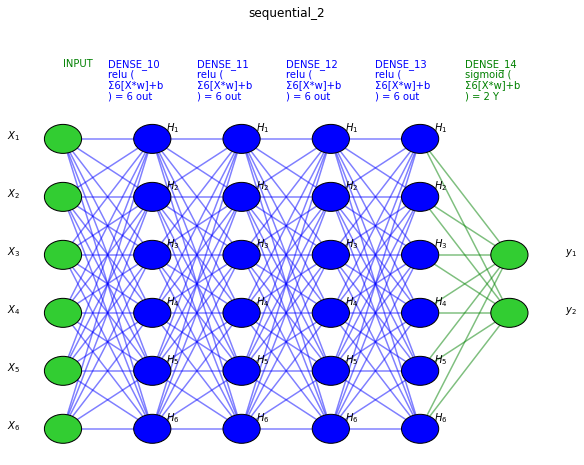

In [35]:
layers=4
nodes=[6,6,6,6]
model=baseline_model(layers,nodes)
visualize_nn(model, description=True, figsize=(10,8))

In [12]:
# work with labels
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y_val_2c)
encoded_Y = encoder.transform(y_val_2c)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y_val = np_utils.to_categorical(encoded_Y)
print(dummy_y_val.shape)

(1530, 2)


In [13]:
# work with labels
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y_train_2c)
encoded_Y = encoder.transform(y_train_2c)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y_train = np_utils.to_categorical(encoded_Y)
print(dummy_y_train)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [0. 1.]]


In [27]:
history = model.fit(X_train, dummy_y_train, epochs=1600, batch_size=10)

Epoch 1/10
867/867 [==============================] - 2s 2ms/step - loss: 0.3508 - accuracy: 0.8284
Epoch 2/10
867/867 [==============================] - 2s 3ms/step - loss: 0.3505 - accuracy: 0.8314
Epoch 3/10
867/867 [==============================] - 3s 3ms/step - loss: 0.3523 - accuracy: 0.8290
Epoch 4/10
867/867 [==============================] - 2s 2ms/step - loss: 0.3550 - accuracy: 0.8257
Epoch 5/10
867/867 [==============================] - 2s 2ms/step - loss: 0.3537 - accuracy: 0.8293
Epoch 6/10
867/867 [==============================] - 2s 2ms/step - loss: 0.3507 - accuracy: 0.8292
Epoch 7/10
867/867 [==============================] - 2s 3ms/step - loss: 0.3532 - accuracy: 0.8275
Epoch 8/10
867/867 [==============================] - 2s 2ms/step - loss: 0.3501 - accuracy: 0.8278
Epoch 9/10
867/867 [==============================] - 2s 2ms/step - loss: 0.3532 - accuracy: 0.8294
Epoch 10/10
867/867 [==============================] - 2s 2ms/step - loss: 0.3512 - accuracy: 0.8266

In [20]:
# evaluate the keras model
_, accuracy = model.evaluate(X_val, dummy_y_val)
print('Accuracy: %.2f' % (accuracy*100))

48/48 [==============================] - 1s 4ms/step - loss: 0.3553 - accuracy: 0.8320
Accuracy: 83.20


In [22]:
y_2c_predict=model.predict(X_val,batch_size=10)
matrix = confusion_matrix(dummy_y_val[:,1], y_2c_predict.argmax(axis=1))
matrix

array([[708,  60],
       [197, 565]], dtype=int64)

In [24]:
Accuracy = accuracy_score(dummy_y_val[:,1], y_2c_predict.argmax(axis=1))
F1= f1_score(dummy_y_val[:,1], y_2c_predict.argmax(axis=1))
Precision = precision_score(dummy_y_val[:,1], y_2c_predict.argmax(axis=1))
Recall = recall_score(dummy_y_val[:,1], y_2c_predict.argmax(axis=1))
print("Accuracy with linear features: " + str(Accuracy))
print("F1 score with linear features: " + str(F1))
print("Recall score with linear features: " + str(Precision))
print("Precision score with linear features: " + str(Recall))

Accuracy with linear features: 0.8320261437908497
F1 score with linear features: 0.8147080028839221
Recall score with linear features: 0.904
Precision score with linear features: 0.7414698162729659


# Grafici + Shap

In [31]:
import shap
def explainer_shap(model, X_names, X_instance, X_train=None, task="classification", top=10):
    ## create explainer
    ### machine learning
    if X_train is None:
        explainer = shap.TreeExplainer(model)
        shap_values = explainer.shap_values(X_instance)
    ### deep learning
    else:
        explainer = shap.DeepExplainer(model, data=X_train[:100])
        shap_values = explainer.shap_values(X_instance.reshape(1,-1))[0].reshape(-1)

    ## plot
    ### classification
    if task == "classification":
        shap.decision_plot(explainer.expected_value, shap_values, link='logit', feature_order='importance',
                           features=X_instance, feature_names=X_names, feature_display_range=slice(-1,-top-1,-1))
    ### regression
    else:
        shap.waterfall_plot(explainer.expected_value[0], shap_values, 
                            features=X_instance, feature_names=X_names, max_display=top)

In [33]:
i = 1
explainer_shap(model, 
               X_names=np.array((X_train).columns), 
               X_instance=X_train[i], 
               X_train=X_train, 
               task="classification", #task="regression"
               top=10)

AttributeError: module 'pandas' has no attribute 'dataset'

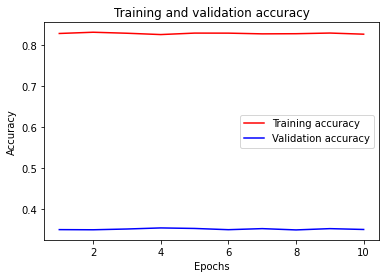

In [30]:
history_dict = history.history

# learning curve
# accuracy
acc = history_dict['accuracy']
#val_acc = history_dict['val_accuracy']

# loss
loss = history_dict['loss']
#val_loss = history_dict['val_loss']

# range of X (no. of epochs)
epochs = range(1, len(acc) + 1)

# plot
# "r" is for "solid red line"
plt.plot(epochs, acc, 'r', label='Training accuracy')
# b is for "solid blue line"
plt.plot(epochs, loss, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [34]:
def utils_nn_config(model):
    lst_layers = []
    if "Sequential" in str(model): #-> Sequential doesn't show the input layer
        layer = model.layers[0]
        lst_layers.append({"name":"input", "in":int(layer.input.shape[-1]), "neurons":0, 
                           "out":int(layer.input.shape[-1]), "activation":None,
                           "params":0, "bias":0})
    for layer in model.layers:
        try:
            dic_layer = {"name":layer.name, "in":int(layer.input.shape[-1]), "neurons":layer.units, 
                         "out":int(layer.output.shape[-1]), "activation":layer.get_config()["activation"],
                         "params":layer.get_weights()[0], "bias":layer.get_weights()[1]}
        except:
            dic_layer = {"name":layer.name, "in":int(layer.input.shape[-1]), "neurons":0, 
                         "out":int(layer.output.shape[-1]), "activation":None,
                         "params":0, "bias":0}
        lst_layers.append(dic_layer)
    return lst_layers


'''
Plot the structure of a keras neural network.
'''
def visualize_nn(model, description=False, figsize=(10,8)):
    ## get layers info
    lst_layers = utils_nn_config(model)
    layer_sizes = [layer["out"] for layer in lst_layers]
    
    ## fig setup
    fig = plt.figure(figsize=figsize)
    ax = fig.gca()
    ax.set(title=model.name)
    ax.axis('off')
    left, right, bottom, top = 0.1, 0.9, 0.1, 0.9
    x_space = (right-left) / float(len(layer_sizes)-1)
    y_space = (top-bottom) / float(max(layer_sizes))
    p = 0.025
    
    ## nodes
    for i,n in enumerate(layer_sizes):
        top_on_layer = y_space*(n-1)/2.0 + (top+bottom)/2.0
        layer = lst_layers[i]
        color = "green" if i in [0, len(layer_sizes)-1] else "blue"
        color = "red" if (layer['neurons'] == 0) and (i > 0) else color
        
        ### add description
        if (description is True):
            d = i if i == 0 else i-0.5
            if layer['activation'] is None:
                plt.text(x=left+d*x_space, y=top, fontsize=10, color=color, s=layer["name"].upper())
            else:
                plt.text(x=left+d*x_space, y=top, fontsize=10, color=color, s=layer["name"].upper())
                plt.text(x=left+d*x_space, y=top-p, fontsize=10, color=color, s=layer['activation']+" (")
                plt.text(x=left+d*x_space, y=top-2*p, fontsize=10, color=color, s="Σ"+str(layer['in'])+"[X*w]+b")
                out = " Y"  if i == len(layer_sizes)-1 else " out"
                plt.text(x=left+d*x_space, y=top-3*p, fontsize=10, color=color, s=") = "+str(layer['neurons'])+out)
        
        ### circles
        for m in range(n):
            color = "limegreen" if color == "green" else color
            circle = plt.Circle(xy=(left+i*x_space, top_on_layer-m*y_space-4*p), radius=y_space/4.0, color=color, ec='k', zorder=4)
            ax.add_artist(circle)
            
            ### add text
            if i == 0:
                plt.text(x=left-4*p, y=top_on_layer-m*y_space-4*p, fontsize=10, s=r'$X_{'+str(m+1)+'}$')
            elif i == len(layer_sizes)-1:
                plt.text(x=right+4*p, y=top_on_layer-m*y_space-4*p, fontsize=10, s=r'$y_{'+str(m+1)+'}$')
            else:
                plt.text(x=left+i*x_space+p, y=top_on_layer-m*y_space+(y_space/8.+0.01*y_space)-4*p, fontsize=10, s=r'$H_{'+str(m+1)+'}$')
    
    ## links
    for i, (n_a, n_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer = lst_layers[i+1]
        color = "green" if i == len(layer_sizes)-2 else "blue"
        color = "red" if layer['neurons'] == 0 else color
        layer_top_a = y_space*(n_a-1)/2. + (top+bottom)/2. -4*p
        layer_top_b = y_space*(n_b-1)/2. + (top+bottom)/2. -4*p
        for m in range(n_a):
            for o in range(n_b):
                line = plt.Line2D([i*x_space+left, (i+1)*x_space+left], 
                                  [layer_top_a-m*y_space, layer_top_b-o*y_space], 
                                  c=color, alpha=0.5)
                if layer['activation'] is None:
                    if o == m:
                        ax.add_artist(line)
                else:
                    ax.add_artist(line)
    plt.show()